<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_04_AdvancedSelect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Super Select: Advanced Retrieval With Mario Brothers Plumbing
### Database and SQL Through Pop Culture | Brendan SHea, PhD

In this chapter, we dive into the world of advanced data retrieval techniques using SQL, focusing on the Mario Brothers Plumbing database. The chapter begins by introducing the database schema, which consists of six interconnected tables designed to manage various aspects of the plumbing business. We explore the relationships between these tables and discuss the significance of data types such as JSON and DECIMAL.

Next, we delve into the powerful GROUP BY clause in SQL, learning how to group rows based on one or more columns and perform aggregate calculations. We also cover the HAVING clause, which allows us to filter grouped rows based on specific conditions.

The chapter then introduces subqueries, explaining how they can be used to nest queries within one another to perform complex data retrieval tasks.

Moving on, we discuss the integration of JSON data in modern relational databases, specifically SQLite. We learn how to store, query, and manipulate JSON data within SQL, showcasing the flexibility and power of this approach.

Finally, we present a detailed case study that demonstrates the importance of business continuity planning in the context of the Toad Medical Center. We cover key aspects of disaster recovery, including planning, documentation, techniques, and testing. We also explore data backup strategies, storage considerations, and retention policies.

Throughout the chapter, we provide numerous hands-on examples and exercises to reinforce the concepts and techniques covered. By the end of this chapter, readers will have a solid understanding of advanced data retrieval techniques using SQL and be well-equipped to apply these skills in real-world scenarios.

Learning Outcomes:

1.  Understand the schema and relationships of a sample database.
2.  Master the usage of the GROUP BY and HAVING clauses in SQL for grouping and filtering data.
3.  Learn how to use subqueries to perform complex data retrieval tasks.
4.  Gain insights into query performance using Big O notation.
5.  Understand how to store, query, and manipulate JSON data within SQL.
6.  Recognize the importance of business continuity planning and disaster recovery strategies.
7.  Familiarize yourself with key aspects of disaster recovery, including planning, documentation, techniques, and testing.
8.  Learn about data backup strategies, storage considerations, and retention policies.


Keywords: SQL, advanced data retrieval, database schema, JSON, DECIMAL, GROUP BY, HAVING, subqueries, Big O notation, business continuity, disaster recovery, data backup

## Brendan's Lecture

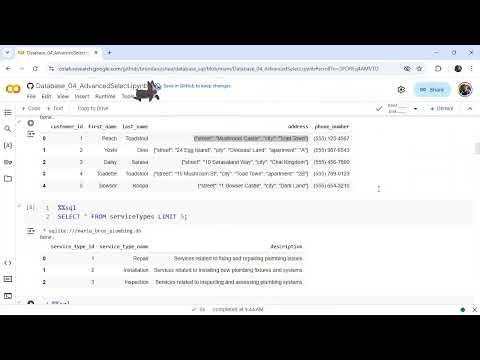

In [37]:
from IPython.display import YouTubeVideo
YouTubeVideo('6VrkMdTZVf8', width=800, height=500)

## Mario Brothers Plumbing: Database Schema
In this lesson, we'll be working with a database that represents the plumbing business of the famous "Mario Brothers". Let's get started.

First, we'll load the database and display the basic schema.

In [38]:
# download database
!wget https://github.com/brendanpshea/database_sql/raw/main/data/mario_bros_plumbing.db -q -nc

!pip install jupysql > /dev/null
%reload_ext sql
# autopandas display of sql
%config SqlMagic.autopandas = True

%sql sqlite:///mario_bros_plumbing.db

In [39]:
# display schema (SQLite)
%%sql
SELECT * FROM sqlite_master WHERE type='table';

Running query in 'sqlite:///mario_bros_plumbing.db'

,type,name,tbl_name,rootpage,sql
0,table,Customers,Customers,2,CREATE TABLE Customers (\n customer_id INTEGE...
1,table,Employees,Employees,3,CREATE TABLE Employees (\n employee_id INTEGE...
2,table,ServiceTypes,ServiceTypes,4,CREATE TABLE ServiceTypes (\n service_type_id...
3,table,Services,Services,5,CREATE TABLE Services (\n service_id INTEGER ...
4,table,Orders,Orders,6,CREATE TABLE Orders (\n -- Keeps track of a c...
5,table,Order_Items,Order_Items,7,CREATE TABLE Order_Items (\n -- Keeps track o...


## Database Overview
The "Mario Brothers Plumbing" database consists of six interconnected tables designed to manage a plumbing business:

1.  **Customers**: Stores customer information, including a JSON field for address.
2.  **Employees**: Stores employee information, including job title and hire date.
3.  **ServiceTypes**: Stores service type information, including name and description.
4.  **Services**: Stores service information, including name, description, and price (DECIMAL).
5.  **Orders**: Stores order information, including customer, employee, date, and total amount (DECIMAL).
6.  **Order_Items**: Stores order item information, including order, service, and quantity.

### Data Types: JSON and DECIMAL
Two notable data types used in this database are JSON and DECIMAL.

JSON (JavaScript Object Notation) is a lightweight data interchange format that allows for flexible and structured data representation. It can store complex data types like objects and arrays. In this database, JSON is used to store customer addresses, as it provides a convenient way to store and retrieve structured address data without the need for separate address-related tables. Later in this chapter, we'll see how to use SQLite to query this data.

DECIMAL is a data type used to store precise numeric values, with a specified precision and scale. It is suitable for storing monetary values, such as prices and total amounts, where exactness is crucial. In this database, DECIMAL(10,2) is used, allowing for prices and total amounts up to 99,999,999.99.

### Relationships

The tables in this database are related through one-to-many relationships, established using foreign key constraints:

-   **Customers** and **Orders**: A customer can have multiple orders, but an order belongs to only one customer. This is a one-to-many relationship, with the `customer_id` foreign key in the Orders table referencing the `customer_id` primary key in the Customers table.
-   **Employees** and **Orders**: An employee can handle multiple orders, but an order is handled by only one employee. This is a one-to-many relationship, with the `employee_id` foreign key in the Orders table referencing the `employee_id` primary key in the Employees table.
-   **Orders** and **Order_Items**: An order can have multiple order items, but an order item belongs to only one order. This is a one-to-many relationship, with the `order_id` foreign key in the Order_Items table referencing the `order_id` primary key in the Orders table.
-   **Services** and **Order_Items**: A service can be included in multiple order items, but an order item includes only one service. This is a one-to-many relationship, with the `service_id` foreign key in the Order_Items table referencing the `service_id` primary key in the Services table.

### Sub-type Relationship

In this database, Services are a **sub-type** of ServiceTypes. This means that each service belongs to a specific service type, and the service type provides a way to categorize and group related services.

The sub-type relationship is encoded in the relational database using a one-to-many relationship between the ServiceTypes and Services tables. The `service_type_id` foreign key in the Services table references the `service_type_id` primary key in the ServiceTypes table. This relationship ensures that each service is associated with a valid service type and allows for efficient querying and data integrity maintenance.

By using a sub-type relationship, the database can store common attributes of service types in the ServiceTypes table, while specific details of individual services are stored in the Services table. This design promotes data normalization, reduces data redundancy, and allows for easier management and extension of the service catalog.

## AN ERD for Mario Brothers Plumbing
Now, let's take a look a the entity-relationship diagram for this database.

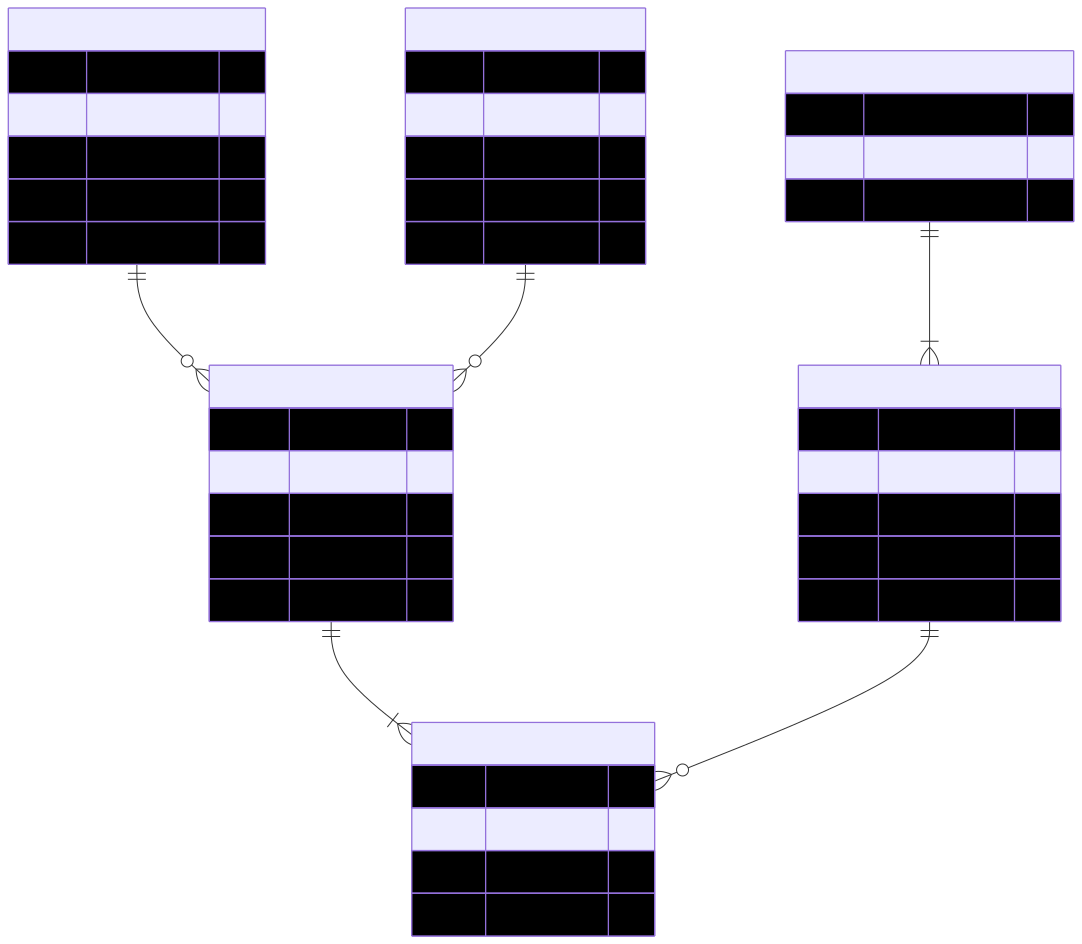

In [42]:
# @title
import base64
import requests
from IPython.display import SVG, display

def mm(graph: str) -> None:
    """
    Fetch and display a Mermaid diagram as SVG.

    Parameters:
      graph (str): Mermaid graph definition.
    """
    # 1. Encode the graph to Base64
    b64 = base64.urlsafe_b64encode(graph.encode('utf-8')).decode('ascii')
    # 2. Construct the SVG URL
    url = f'https://mermaid.ink/svg/{b64}'
    # 3. Fetch SVG content
    svg_data = requests.get(url).text
    # 4. Render inline in Jupyter
    display(SVG(data=svg_data))

mm("""
erDiagram
    CUSTOMERS ||--o{ ORDERS : places
    EMPLOYEES ||--o{ ORDERS : handles
    ORDERS ||--|{ ORDER_ITEMS : contains
    SERVICES ||--o{ ORDER_ITEMS : "included in"
    SERVICETYPES ||--|{ SERVICES : categorizes

    CUSTOMERS {
        integer customer_id PK
        varchar first_name
        varchar last_name
        json address
        varchar phone_number
    }

    EMPLOYEES {
        integer employee_id PK
        varchar first_name
        varchar last_name
        varchar job_title
        date hire_date
    }

    SERVICETYPES {
        integer service_type_id PK
        varchar service_type_name
        varchar description
    }

    SERVICES {
        integer service_id PK
        integer service_type_id FK
        varchar service_name
        varchar description
        decimal price
    }

    ORDERS {
        integer order_id PK
        integer customer_id FK
        integer employee_id FK
        date order_date
        decimal total_amount
    }

    ORDER_ITEMS {
        integer order_item_id PK
        integer order_id FK
        integer service_id FK
        integer quantity
    }
""")

If you look closely, here's what this ERD shows us:
1.  Each customer can place multiple orders, but each order is associated with only one customer. This is shown by the one-to-many relationship between CUSTOMERS and ORDERS. The diagram indicates that a customer record contains basic information like name, address, and phone number, while an order includes details such as the order date and total amount.
2. Employees are responsible for handling orders. The diagram shows a one-to-many relationship between EMPLOYEES and ORDERS, meaning one employee can handle multiple orders, but each order is handled by only one employee. Employee information includes their name, job title, and hire date.
3. An order consists of multiple order items, represented by the one-to-many relationship between ORDERS and ORDER_ITEMS. Each order item is linked to a specific service and includes the quantity of that service ordered. This structure allows for flexibility in creating orders with various services.
4. The diagram illustrates a two-level **subtype-supertype** hierarchy for services. SERVICETYPES categorize the SERVICES offered. Each service belongs to one service type, but a service type can have multiple services. This allows for grouping similar services (e.g., "exterior wash" or "interior cleaning") while maintaining detailed information about each specific service, including its name, description, and price.
5.  The use of primary keys (PK) and foreign keys (FK) in the diagram ensures data integrity and establishes clear relationships between entities. For example, the order_id in ORDER_ITEMS is a foreign key referencing the primary key in ORDERS, ensuring that every order item is associated with a valid order. Similarly, the service_id in SERVICES is linked to SERVICE_TYPES, maintaining the hierarchical relationship between service types and individual services.

## A Quick Look at the Data
Now, let's take a quick look at the data in each table.

In [ ]:
%%sql
SELECT * FROM employees LIMIT 5;

In [ ]:
%%sql
SELECT * FROM customers LIMIT 5;

In [ ]:
%%sql
SELECT * FROM serviceTypes LIMIT 5;

In [ ]:
%%sql
SELECT * FROM services LIMIT 5;

In [ ]:
%%sql
SELECT * FROM orders LIMIT 5;

In [ ]:
%%sql
SELECT * FROM order_items LIMIT 5;

## Using GROUP BY in SQL

The `GROUP BY` clause in SQL is used to group rows in a result set based on one or more columns. It is often used in combination with aggregate functions like `COUNT()`, `SUM()`, `AVG()`, `MIN()`, and `MAX()` to perform calculations on grouped data.

The basic syntax of `GROUP BY` is as follows:

```sql
SELECT
 column1,
 column2,
 ...,
 aggregate_function(column) -- Ex: SUM(), COUNT(), AVG()
FROM
 table_name
GROUP BY column1, column2, ...;
```

When using `GROUP BY`, the `SELECT` statement should only include columns that are either listed in the `GROUP BY` clause or used with an aggregate function. The `GROUP BY` clause comes after the `FROM` and `WHERE` clauses but before the `ORDER BY` clause.

Let's explore some examples using the "Mario Brothers Plumbing" database to understand how GROUP BY can be used in practice.

### Example: Counting Orders per Customer (with Table Aliases)

Suppose we want to count the number of orders placed by each customer. We can use `GROUP BY` with the `COUNT()` aggregate function to achieve this.

In [43]:
%%sql
--Number of orders by each customer
SELECT
  c.customer_id AS "customer_id",
  c.first_name,
  c.last_name,
  COUNT(o.order_id) AS order_count
FROM
  Customers c -- We use a Table alias "c" for "Customers"
  -- Table alias "o" for orders
  JOIN Orders o ON c.customer_id = o.customer_id
-- We group by all columns in the select clause, but NOT the COUNT
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY order_count DESC
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,customer_id,first_name,last_name,order_count
0,3,Daisy,Sarasa,67
1,1,Peach,Toadstool,63
2,2,Yoshi,Dino,57
3,6,Wario,Wario,32
4,4,Toadette,Toadstool,27
5,5,Bowser,Koopa,27
6,29,Birdo,Egg,4
7,14,Zelda,Hyrule,3
8,17,Pikachu,Pokemon,3
9,23,Toad,Toadstool,3


A few things happen in this query:

1. First, **table aliases** are used to give a table, or a subquery in a FROM clause, a temporary name. They can make queries easier to write and to read by shortening the names of tables. In this query, 'c' is an alias for the 'Customers' table, and 'o' is an alias for the 'Orders' table. This allows us to refer to these tables using these shorter names throughout the query.

2.  The `GROUP BY` statement in SQL is used to group rows that have the same values in specified columns. In this case, we're grouping by 'c.customer_id', which means that the result set will have one row for each unique customer_id in the 'Customers' table.

3. The query is also using a aggregate function, `COUNT()`, to count the number of orders for each customer. The `COUNT()` function returns the number of rows that matches a specified criteria. In this case, it's counting the number of 'o.order_id' for each group of 'c.customer_id'.

So, the overall result of this query will be a list of customers (with their customer_id, first_name, and last_name), along with the number of orders that each customer has made.

### Example: Calculating Total Order Sales per Employee (with PRINTF)

Let's say we want to calculate the total amount of sales handled by each employee. We can use `GROUP BY` with the `SUM()` aggregate function.

In [44]:
%%sql
SELECT
  e.employee_id,
  e.first_name,
  e.last_name,
  -- We can use printf to format the way currency appears
  PRINTF("$%.2f", SUM(o.total_amount)) AS total_sales_usd
FROM
  Employees e
  JOIN Orders o ON e.employee_id = o.employee_id
-- One row per employee id
GROUP BY e.employee_id;

Running query in 'sqlite:///mario_bros_plumbing.db'

,employee_id,first_name,last_name,total_sales_usd
0,1,Super,Mario,$68485.00
1,2,Super,Luigi,$38815.00
2,3,Princess,Peach,$33755.00
3,4,Cat,Peach,$11635.00
4,5,Tanuki,Mario,$25855.00
5,6,Fire,Luigi,$17430.00
6,7,Toad,Toadstool,$7185.00


Here, the `GROUP BY` clause is used to group the result set by one or more columns. In this query, we group the rows by `employee_id`. This means that the query will produce one row per unique `employee_id` value. When `GROUP BY` is used, any column in the `SELECT` list that is not an aggregate function (like `SUM()`) must be included in the `GROUP BY` clause. In this case, `employee_id`, `first_name`, and `last_name` are not aggregate functions, so they must (technically) be listed in the `GROUP BY` clause. However, since `employee_id` uniquely identifies each employee, we only need to include `employee_id` in the `GROUP BY` clause.

The `PRINTF()` function is used to format the total sales amount as a currency string. It takes two arguments: a format string and a value.
  -   The format string `"$%.2f"` specifies that the output should start with a dollar sign (`$`), followed by the value with two decimal places (`%.2f`).
  -   The value passed to `PRINTF()` is the result of `SUM(o.total_amount)`, which calculates the sum of `total_amount` for each employee. Since we are grouping by `employee_id`, the `SUM()` function will calculate the total sales for each employee.

### Finding the Most Popular Service Type

To find the most popular service type based on the number of order items, we can use `GROUP BY` with the `COUNT()` function and an `ORDER BY` clause.

In [45]:
%%sql
SELECT
  st.service_type_name AS most_popular_service,
  COUNT(oi.order_item_id) AS order_item_count
FROM
  ServiceTypes st
  JOIN Services s ON st.service_type_id = s.service_type_id
  JOIN Order_Items oi ON s.service_id = oi.service_id
GROUP BY st.service_type_name -- biggest first
ORDER BY order_item_count DESC  -- top result only
LIMIT 1;

Running query in 'sqlite:///mario_bros_plumbing.db'

,most_popular_service,order_item_count
0,Repair,582


In this example, we join the ServiceTypes, Services, and Order_Items tables to connect the service types with their corresponding order items. We group the results by `service_type_name` and count the number of order items for each service type using `COUNT()`. The `ORDER BY` clause is used to sort the results in descending order based on the `order_item_count`, and the `LIMIT` clause is used to retrieve only the top result, which represents the most popular service type.

## Using HAVING in SQL

The `HAVING` clause in SQL is used to filter the results of an aggregate function based on a specified condition. It is similar to the `WHERE` clause, but while `WHERE` filters individual rows before grouping, `HAVING` filters grouped rows after the `GROUP BY` clause has been applied.

The basic syntax of `HAVING` is as follows:

```sql
SELECT
  column1,
  column2,
  ...,
  aggregate_function(column)
FROM table_name
(WHERE condition) -- A WHERE comes before
GROUP BY column1, column2, ...
-- HAVING comes after a group by
HAVING condition;
```

The `HAVING` clause comes after the `GROUP BY` clause and before the `ORDER BY` clause. The condition in the `HAVING` clause typically involves an aggregate function and can use comparison operators like `=`, `>`, `<`, `>=`, `<=`, and `<>`.

### Example: Filtering Employees by Total Sales Amount
Suppose we want to find employees who have achieved total sales greater than $20,000. We can use HAVING with the SUM() aggregate function to filter the grouped results.

In [46]:
%%sql
SELECT
  e.employee_id,
  e.first_name,
  e.last_name,
  PRINTF("$%.2f", SUM(o.total_amount)) AS total_sales_usd
FROM
  Employees e
  JOIN Orders o ON e.employee_id = o.employee_id
GROUP BY e.employee_id
HAVING SUM(o.total_amount) > 20000;

Running query in 'sqlite:///mario_bros_plumbing.db'

,employee_id,first_name,last_name,total_sales_usd
0,1,Super,Mario,$68485.00
1,2,Super,Luigi,$38815.00
2,3,Princess,Peach,$33755.00
3,5,Tanuki,Mario,$25855.00


In this example, we join the Employees and Orders tables, group the results by `employee_id`, and calculate the total sales for each employee using `SUM()`. The `HAVING` clause then filters the grouped results to include only employees whose total sales exceed $1000.

### Example: Filtering Service Types by Average Price

Let's say we want to find service types whose average price is greater than $100. We can use `HAVING` with the `AVG()` aggregate function to filter the grouped results.

In [47]:
%%sql
SELECT
  st.service_type_name,
  PRINTF("$%.2f", AVG(s.price)) AS average_price
FROM
  ServiceTypes st
  JOIN Services s ON st.service_type_id = s.service_type_id
GROUP BY st.service_type_name
HAVING AVG(s.price) > 100;

Running query in 'sqlite:///mario_bros_plumbing.db'

,service_type_name,average_price
0,Installation,$175.00
1,Repair,$123.75


Here, we join the ServiceTypes and Services tables, group the results by `service_type_name`, and calculate the average price for each service type using `AVG()`. The `HAVING` clause then filters the grouped results to include only service types whose average price is greater than $100.

## Subqueries in SQL
A **subquery**, also known as a nested query or inner query, is a query within another query. It allows you to use the results of one query as input for another query. Subqueries can be used in various parts of an SQL statement, such as `SELECT`, `FROM`, `WHERE`, and `HAVING` clauses.

The basic syntax of a subquery is as follows:

```sql
SELECT ... -- Start of "outer query"
FROM ...
WHERE column_name operator (
  -- Start of subquery ("inner query")
    SELECT ...
    FROM ...
    WHERE ...
);
```

The subquery is enclosed in parentheses and placed within the outer query. The outer query uses the results of the subquery to perform further operations or filtering.

Let's take a look at a few examples.

### Subquery in the SELECT Clause
Suppose we want to retrieve the customer details along with the difference between their total order amount and the average order amount of all customers. We can use a subquery in the SELECT clause to calculate the average order amount.

In [48]:
%%sql
SELECT
  c.customer_id,
  c.first_name,
  c.last_name,
  SUM(o.total_amount) AS total_order_amount,
  (SUM(o.total_amount) -
    -- We subtract the results of this subquery
    (SELECT AVG(total_amount) FROM Orders)
  ) AS difference_from_average
FROM
  Customers c
  JOIN  Orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,customer_id,first_name,last_name,total_order_amount,difference_from_average
0,1,Peach,Toadstool,37110,36450.38961
1,2,Yoshi,Dino,35635,34975.38961
2,3,Daisy,Sarasa,46210,45550.38961
3,4,Toadette,Toadstool,20450,19790.38961
4,5,Bowser,Koopa,18275,17615.38961
5,6,Wario,Wario,21465,20805.38961
6,7,Waluigi,Wario,2295,1635.38961
7,8,Donkey,Kong,75,-584.61039
8,9,Diddy,Kong,1065,405.38961
9,11,Cappy,Bonneter,570,-89.61039


In this example, the subquery `(SELECT AVG(total_amount) FROM Orders)` calculates the average order amount of all customers. The result of the subquery is then used in the outer query to calculate the difference between each customer's total order amount and the average order amount. This calculation would be difficult to achieve without a subquery.

We can use PRINTF to clean up the presentation of this data as follows:

In [49]:
%%sql
SELECT
  c.customer_id,
  c.first_name,
  c.last_name,
  PRINTF("$%.2f", SUM(o.total_amount)) AS total_order_amount,
  PRINTF("$%.2f",
    (
    SUM(o.total_amount) -
    -- We subtract the results of this subquery
    (SELECT AVG(total_amount) FROM Orders)
    )
  )AS difference_from_average
FROM
  Customers c
  JOIN Orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,customer_id,first_name,last_name,total_order_amount,difference_from_average
0,1,Peach,Toadstool,$37110.00,$36450.39
1,2,Yoshi,Dino,$35635.00,$34975.39
2,3,Daisy,Sarasa,$46210.00,$45550.39
3,4,Toadette,Toadstool,$20450.00,$19790.39
4,5,Bowser,Koopa,$18275.00,$17615.39
5,6,Wario,Wario,$21465.00,$20805.39
6,7,Waluigi,Wario,$2295.00,$1635.39
7,8,Donkey,Kong,$75.00,$-584.61
8,9,Diddy,Kong,$1065.00,$405.39
9,11,Cappy,Bonneter,$570.00,$-89.61


###  Subquery in the `WHERE` or `HAVING` Clauses

Let's say we want to find the employees who have greater than average sales per order.

In [50]:
%%sql
SELECT
  e.employee_id,
  e.first_name,
  e.last_name,
  PRINTF("$%.2f", SUM(o.total_amount) / COUNT(o.total_amount)) AS avg_sales_order
FROM
  Employees e
  JOIN Orders o ON e.employee_id = o.employee_id
GROUP BY e.employee_id
HAVING (SUM(o.total_amount) / COUNT(o.total_amount)) >
  (SELECT AVG(total_amount) FROM Orders);

Running query in 'sqlite:///mario_bros_plumbing.db'

,employee_id,first_name,last_name,avg_sales_order
0,1,Super,Mario,$678.00
1,3,Princess,Peach,$675.00
2,5,Tanuki,Mario,$698.00
3,7,Toad,Toadstool,$718.00


The query retrieves employee details and their average sales per order, but only for employees whose average sales per order is greater than the overall average order amount. It joins the `Employees` and `Orders` tables, groups the results by `employee_id`, calculates the average sales per order using `SUM` and `COUNT`, and filters the results using a `HAVING` clause that compares each employee's average sales with the overall average calculated by a subquery.

The **CASE** statement in SQL is a powerful tool for introducing conditional logic into your queries. It allows you to evaluate conditions and return specific values depending on whether those conditions are met. This is particularly useful when you need to categorize data, perform calculations based on certain thresholds, or otherwise transform your dataset without altering the underlying table structure.

### General Syntax of CASE

The basic syntax for a **CASE** statement looks like this:

```sql
SELECT
    CASE
        WHEN condition1 THEN result1
        WHEN condition2 THEN result2
        ...
        ELSE default_result
    END AS new_column_name
FROM table_name;
```

#### Components:
- **WHEN condition THEN result**: Each `WHEN` clause is a condition, and `THEN` specifies the value that will be returned if the condition is true.
- **ELSE default_result**: (Optional) If none of the `WHEN` conditions are met, the `ELSE` clause specifies the default value to return.
- **END**: This keyword closes the `CASE` statement.
- **AS new_column_name**: This labels the resulting value as a new column in the output.

### Motivation for Using CASE

The primary motivation for using a **CASE** statement is that it allows for flexible data manipulation directly in SQL queries. Rather than having to pre-process data in another language or tool, you can transform your data in real time as it’s queried. This is especially helpful when categorizing data or creating dynamic outputs without altering the actual table contents.

### Example: Using CASE in the Mario Brothers Plumbing Database

To illustrate how **CASE** works, let's consider an example from the **Mario Brothers plumbing database**. Suppose we have a table called `Services`, which lists various plumbing services along with their prices. We want to categorize each service as either "Expensive" or "Affordable" based on its price, where any service costing more than 100 coins is labeled as "Expensive" and anything else as "Affordable."

Here’s the query that accomplishes this:

In [51]:
%%sql
SELECT service_name,
       CASE
           WHEN price > 100 THEN 'Expensive'
           ELSE 'Affordable'
       END AS price_category
FROM Services;

Running query in 'sqlite:///mario_bros_plumbing.db'

,service_name,price_category
0,Pipe Repair,Affordable
1,Drain Cleaning,Affordable
2,Toilet Installation,Expensive
3,Sink Replacement,Expensive
4,Water Heater Repair,Expensive
5,Plumbing Inspection,Affordable
6,Emergency Service,Expensive


## JSON and SQL
In chapter 1, we discussed different logical "data models", or ways of organizing information. The two most prominent data models in use today are:

1. The **relational model** that organizes data into related "tables". SQL is designed for databases organized on this model. SQLite follows this model, as do most other leading databases (MySQL, Oracle, SQL Server, Postgres).
2. Databases in **key-value** structures, such as **JSON**. These are sometimes called **document databases**. MongoDB is the most widely used type of this database.

As it turns out, most modern relational databases have added the capacity to deal natively with JSON data. (And so, they are technically "hybrid" databases). We'll briefly take a look at how this works, using the `Address` column of the `Customer` table in our Mario Bros plumbing database.

The **JSON** (JavaScript Object Notation) format is a lightweight, text-based way to represent structured data. In the following example, the entire snippet is an **object**—an unordered collection of **key-value pairs**. A **key-value pair** consists of a **key**—always a string—and a **value**, which may be a string, number, **array**, another object, **boolean**, or **null**. The simplicity and clarity of this structure make JSON ideal for data interchange between systems.

Consider a simple example:  

```javascript
// A simple JSON object representing an address
{
  "street": "Mushroom Castle",
  "city": "Toad Town",
  "zip_code": "12345",
  "country": "Mushroom Kingdom"
}
```

Each **key** (such as `"street"`) is associated with a **value** (`"Mushroom Castle"`), where both are represented as strings. The following table details each element of this JSON object:

| **Key**    | **Value**              | **Explanation**                                                       |
|------------|------------------------|-----------------------------------------------------------------------|
| street     | "Mushroom Castle"      | A **string** representing the street name or location of the building.|
| city       | "Toad Town"            | A **string** denoting the name of the city.                           |
| zip_code   | "12345"                | A **string** (or sometimes a **number**) used as the postal code.      |
| country    | "Mushroom Kingdom"     | A **string** that identifies the country or region.                   |

To illustrate JSON’s versatility, consider an expanded example that includes nested objects and arrays. This is typical in applications where data has a hierarchical structure:

```javascript
{
  "person": {
    "name": "Mario",
    "contact": {
      "email": "mario@example.com",
      "phone": "555-0199"
    },
    "addresses": [
      {
        "type": "home",
        "street": "Mushroom Castle",
        "city": "Toad Town",
        "zip_code": "12345",
        "country": "Mushroom Kingdom"
      },
      {
        "type": "office",
        "street": "Peach Blvd",
        "city": "Royal City",
        "zip_code": "67890",
        "country": "Mushroom Kingdom"
      }
    ]
  }
}
```

In this extended example, the **object** assigned to `"person"` encapsulates several **key-value pairs**. The `"contact"` key holds another **object** for email and phone, and the `"addresses"` key is associated with an **array** of objects. An **array** is an ordered list of values, and here each element of the array is a separate address record. This demonstrates how JSON can represent complex, nested data structures in a clear and organized manner.

The use of JSON spans from simple configurations to transmitting detailed data between servers and clients, making it an essential tool in modern data exchange and application development.

### Storing JSON in SQLite

SQLite provides support for storing JSON data directly in database columns. You can store JSON objects as text in a column of type TEXT. In our database, we have a table called `Customers` with a column named `address` that stores JSON data representing customer addresses. Let's see what this looks like:

In [52]:
%%sql
SELECT address FROM Customers LIMIT 15;

Running query in 'sqlite:///mario_bros_plumbing.db'

,address
0,"{""street"": ""Mushroom Castle"", ""city"": ""Toad To..."
1,"{""street"": ""24 Egg Island"", ""city"": ""Dinosaur ..."
2,"{""street"": ""10 Sarasaland Way"", ""city"": ""Chai ..."
3,"{""street"": ""15 Mushroom St"", ""city"": ""Toad Tow..."
4,"{""street"": ""1 Bowser Castle"", ""city"": ""Dark La..."
5,"{""street"": ""100 Gold Coin Blvd"", ""city"": ""Diam..."
6,"{""street"": ""101 Silver Coin Ave"", ""city"": ""Dia..."
7,"{""street"": ""50 Banana Jungle"", ""city"": ""DK Isl..."
8,"{""street"": ""51 Banana Jungle"", ""city"": ""DK Isl..."
9,"{""street"": ""Comet Observatory"", ""city"": ""Space""}"


### Querying JSON Data in SQLite
To extract a specific value from a JSON column, you can use the `json_extract()` function in the SELECT statement. The `json_extract()` function takes the JSON column and a path expression as arguments. For example, to retrieve the street address for each customer:

In [53]:
%%sql
SELECT
  customer_id,
  -- address is the (JSON) column, and street is a "key"
  json_extract(address, '$.street') AS street
FROM Customers
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,customer_id,street
0,1,Mushroom Castle
1,2,24 Egg Island
2,3,10 Sarasaland Way
3,4,15 Mushroom St
4,5,1 Bowser Castle
5,6,100 Gold Coin Blvd
6,7,101 Silver Coin Ave
7,8,50 Banana Jungle
8,9,51 Banana Jungle
9,10,Comet Observatory


This query will return the `customer_id` and the value of the "street" key from the JSON object stored in the `address` column. The `$` symbol represents the root of the JSON object, and `.street` specifies the path to the "street" key.

You can extract multiple values from a JSON column by specifying multiple path expressions in the `json_extract()` function. For example, to retrieve the street and city for each customer:

In [54]:
%%sql
SELECT
  customer_id,
  last_name,
  json_extract(address, '$.street') AS street,
  json_extract(address, '$.city') AS city
FROM Customers
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,customer_id,last_name,street,city
0,1,Toadstool,Mushroom Castle,Toad Town
1,2,Dino,24 Egg Island,Dinosaur Land
2,3,Sarasa,10 Sarasaland Way,Chai Kingdom
3,4,Toadstool,15 Mushroom St,Toad Town
4,5,Koopa,1 Bowser Castle,Dark Land
5,6,Wario,100 Gold Coin Blvd,Diamond City
6,7,Wario,101 Silver Coin Ave,Diamond City
7,8,Kong,50 Banana Jungle,DK Island
8,9,Kong,51 Banana Jungle,DK Island
9,10,Cosmic,Comet Observatory,Space


You can use JSON values in the WHERE clause to filter rows based on specific conditions. The `json_extract()` function can be used to extract the desired JSON value for comparison. For example, to find customers who live in the city "Toad Town":

In [55]:
%%sql
SELECT
  customer_id,
  first_name,
  last_name,
  json_extract(address, '$.city') AS city
FROM Customers
WHERE json_extract(address, '$.city') = 'Toad Town'
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,customer_id,first_name,last_name,city
0,1,Peach,Toadstool,Toad Town
1,4,Toadette,Toadstool,Toad Town
2,23,Toad,Toadstool,Toad Town
3,28,Toadsworth,Toadstool,Toad Town


To check if a specific key exists in a JSON column, you can use the `json_type()` function in the WHERE clause. The `json_type()` function returns the data type of the value at the specified path. If the key exists, it will return the data type; otherwise, it will return NULL. For example, to find customers who have a "apartment" key in their address:

In [56]:
%%sql
SELECT
  customer_id,
  first_name,
  last_name,
  json_extract(address, '$.apartment') AS apartment
FROM Customers
WHERE json_type(address, '$.apartment') IS NOT NULL
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,customer_id,first_name,last_name,apartment
0,2,Yoshi,Dino,A
1,4,Toadette,Toadstool,2B
2,27,Lakitu,Cloud,Skyview


We can also combine JSON with what we've been learning about GROUP BY in this chapter. For example, here is a query that gives a count of how many residents live in each city.

In [57]:
%%sql
-- Count of residents in each city
SELECT
  json_extract(address, '$.city') AS city,
  COUNT(*) AS resident_count
FROM Customers
GROUP BY city
LIMIT 10;

Running query in 'sqlite:///mario_bros_plumbing.db'

,city,resident_count
0,Acorn Plains,1
1,Cap Kingdom,1
2,Chai Kingdom,1
3,DK Island,4
4,Dark Land,4
5,Diamond City,2
6,Dinosaur Land,1
7,Eagleland,1
8,Hyrule Kingdom,2
9,Kanto Region,1


Or, a bit more ambitiously, we could find out some summary statistics about the orders in each city:

In [58]:
%%sql
SELECT
  json_extract(c.address, '$.city') AS city,
  COUNT(*) AS order_count,
  MAX(total_amount) AS max_order_amount,
  MIN(total_amount) AS min_order_amount,
  AVG(total_amount) AS avg_order_amount
FROM
  Customers c
  JOIN Orders o ON c.customer_id = o.customer_id
GROUP BY city

Running query in 'sqlite:///mario_bros_plumbing.db'

,city,order_count,max_order_amount,min_order_amount,avg_order_amount
0,Acorn Plains,3,1575,225,800.000000
1,Cap Kingdom,1,570,570,570.000000
2,Chai Kingdom,67,1485,75,689.701493
3,DK Island,4,1065,75,553.750000
4,Dark Land,31,1700,75,677.258065
5,Diamond City,34,1620,50,698.823529
6,Dinosaur Land,57,2210,50,625.175439
7,Hyrule Kingdom,4,1025,150,640.000000
8,Kanto Region,3,850,300,483.333333
9,Lycia,1,775,775,775.000000


### Putting it Altogether
Finally, let's put everything (well, not everything, but a bunch of thigs) we've learned into a sigle query.

In [59]:
%%sql
SELECT
  json_extract(c.address, '$.city') AS city,
  COUNT(*) AS order_count,
  PRINTF('$%.2f', MAX(total_amount)) AS max_order_amount,
  PRINTF('$%.2f', MIN(total_amount)) AS min_order_amount,
  PRINTF('$%.2f', AVG(total_amount)) AS avg_order_amount
FROM
  Customers c
  JOIN Orders o ON c.customer_id = o.customer_id
WHERE c.first_name NOT IN ("Wario", "Bowser")
GROUP BY city
HAVING order_count > 10
ORDER BY order_count DESC;


Running query in 'sqlite:///mario_bros_plumbing.db'

,city,order_count,max_order_amount,min_order_amount,avg_order_amount
0,Toad Town,94,$1600.00,$75.00,$637.71
1,Chai Kingdom,67,$1485.00,$75.00,$689.70
2,Dinosaur Land,57,$2210.00,$50.00,$625.18


his query demonstrates various SQL concepts and techniques that we have learned in the course so far. Let's go through each part:

1.  `SELECT` clause:
    -   `json_extract(address, '$.city') AS city`: Extracts the value of the "city" key from the JSON object stored in the `address` column of the `Customers` table and aliases it as `city`.
    -   `COUNT(*) AS order_count`: Counts the number of rows in each group and aliases the result as `order_count`.
    -   `PRINTF('$%.2f', MAX(total_amount)) AS max_order_amount`: Calculates the maximum value of `total_amount` for each group, formats it as a currency string using `PRINTF`, and aliases the result as `max_order_amount`.
    -   `PRINTF('$%.2f', MIN(total_amount)) AS min_order_amount`: Calculates the minimum value of `total_amount` for each group, formats it as a currency string using `PRINTF`, and aliases the result as `min_order_amount`.
    -   `PRINTF('$%.2f', AVG(total_amount)) AS avg_order_amount`: Calculates the average value of `total_amount` for each group, formats it as a currency string using `PRINTF`, and aliases the result as `avg_order_amount`.
2.  `FROM` clause:
    -   `Customers c`: Specifies the `Customers` table as the main table for the query and assigns it the alias `c`.
3.  `JOIN` clause:
    -   `JOIN Orders o ON c.customer_id = o.customer_id`: Performs an inner join between the `Customers` table (aliased as `c`) and the `Orders` table (aliased as `o`) based on the matching `customer_id` column. This join retrieves rows from both tables where the `customer_id` values match.
4.  `WHERE` clause:
    -   `Customers.first_name NOT IN ("Wario", "Bowser")`: Filters the rows from the `Customers` table where the `first_name` is not "Wario" or "Bowser". This condition excludes customers with those specific first names from the result set.
5.  `GROUP BY` clause:
    -   `GROUP BY city`: Groups the rows based on the `city` column extracted from the JSON address object. This clause ensures that the aggregate functions (`COUNT`, `MAX`, `MIN`, `AVG`) are applied to each group of rows with the same city value.
6.  `HAVING` clause:
    -   `HAVING order_count > 10`: Filters the grouped rows based on the condition that the `order_count` (calculated by `COUNT(*)`) is greater than 10. This clause removes cities with 10 or fewer orders from the result set.
7.  `ORDER BY` clause:
    -   `ORDER BY order_count DESC`: Sorts the result set in descending order based on the `order_count` column. Cities with the highest number of orders will appear first in the result set.

This query showcases the use of JSON extraction, joining tables, aggregate functions, grouping, filtering with `WHERE` and `HAVING` clauses, and ordering the results.

## Lab: Practice Your SQL

In [60]:
!wget https://github.com/brendanpshea/database_sql/raw/main/sql_select_quiz/sql_select_quiz.py -q -nc
from sql_select_quiz import sql_select_quiz_from_id
sql_select_quiz_from_id("mario")

## Case Study: Business Continuity at the Toad Medical Center

Just across town from Mario Bros Plumbing, the Toad Town Medical Center stands as a beacon of hope and healing for the region's residents. As the primary healthcare facility serving the diverse needs of the Kingdom's population, the medical center plays a critical role in ensuring the well-being and safety of its patients.

However, the Toad Town Medical Center, like any other organization, is not immune to the risks posed by unexpected disasters and disruptions. From natural calamities to technological failures, the medical center faces a wide range of potential threats that could compromise its ability to deliver essential healthcare services.

Recognizing the importance of maintaining operational resilience in the face of adversity, the Toad Town Medical Center has embarked on a comprehensive business continuity planning initiative. By developing and implementing a robust disaster recovery (DR) strategy, the medical center aims to ensure that its critical systems and data remain available, secure, and recoverable, even in the most challenging circumstances.

In this case study, we will explore the key components of the Toad Town Medical Center's business continuity plan, including its DR planning process, documentation, techniques, and testing procedures. We will also examine how the medical center has addressed crucial aspects such as data backup, storage, and retention, to create a comprehensive and effective approach to business continuity.

### Disaster Recovery Planning at the Toad Medical Center

**Disaster recovery (DR) planning** is a critical process that helps organizations like the Toad Town Medical Center prepare for, respond to, and recover from potential disasters that could disrupt their operations. The main goal of DR planning is to minimize the impact of a disaster and ensure that the medical center can quickly restore its critical systems and data to maintain continuity of care for the Mushroom Kingdom's residents.

Key components of DR planning include:

1.  **Risk assessment** involves identifying potential risks and vulnerabilities that could affect the medical center, such as power outages, cyber-attacks, natural disasters, and equipment failures.
2.  **Mitigation strategies** minimize the impact of identified risks, such as implementing backup power systems, secure data storage solutions, and regularly updating software and hardware.
3.  Creating detailed **documentation** and procedures for disaster response and recovery, including clear communication protocols, roles and responsibilities for staff members, and step-by-step guides for restoring critical systems and data.
4. Regularly **testing** the DR plan through simulations and drills to identify weaknesses and areas for improvement, and updating the plan as needed to ensure it remains effective.

To implement a robust DR plan, the Toad Town Medical Center should take the following steps:

1. The medical center should assess its infrastructure, systems, and data to identify potential vulnerabilities and prioritize critical assets. For example, the medical center may determine that its electronic health record (EHR) system and medical equipment are the most critical assets to protect.
2. Based on the risk assessment, the medical center should create a detailed DR plan that outlines specific procedures for responding to and recovering from disasters. This may include steps such as activating a backup EHR system, relocating patients to a secondary care facility, or implementing manual recordkeeping procedures.
3.  To ensure continuity of operations during a disaster, the medical center should invest in **redundant systems**, such as backup power generators, secondary data storage solutions, and failover network connections. For example, the medical center may install a backup generator to maintain power for critical medical equipment and systems during an outage.
4.  The medical center should regularly test its DR plan through simulations and drills to identify weaknesses and ensure staff members are prepared to respond to a disaster. This may involve conducting tabletop exercises to walk through specific disaster scenarios or performing full-scale drills to test the activation of backup systems and procedures.

By implementing a comprehensive DR planning process, the Toad Town Medical Center can ensure that it is prepared to respond to and recover from potential disasters, minimizing disruptions to patient care and maintaining the trust of the Mushroom Kingdom's residents.

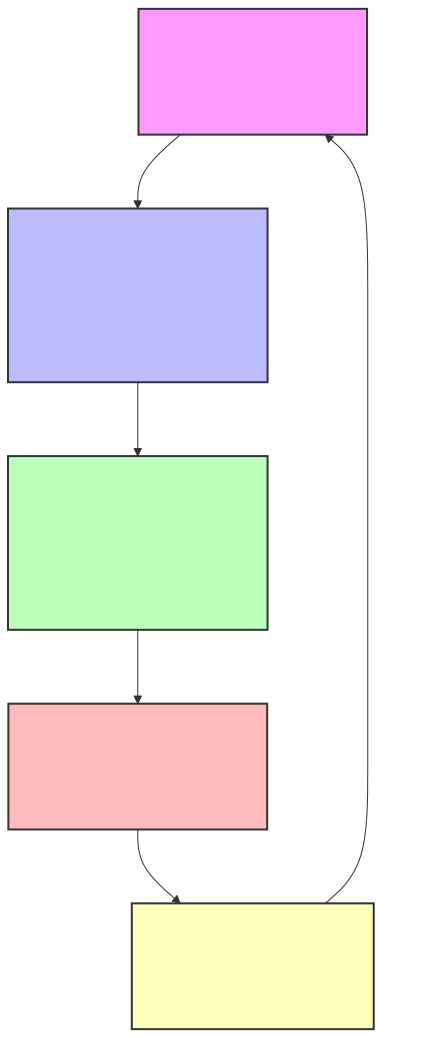

In [61]:
# @title
mm("""graph TD
    A[Risk Assessment<br>*Identify potential risks<br>*Assess vulnerabilities<br>*Prioritize critical assets] -->|Informs| B[Plan Development<br>*Create detailed procedures<br>*Define roles and responsibilities<br>*Document communication protocols]
    B -->|Guides| C[Implementation<br>*Install redundant systems<br>*Set up backup power and data storage<br>*Establish failover connections]
    C -->|Prepares for| D[Testing & Training<br>*Conduct tabletop exercises<br>*Perform full-scale drills<br>Train staff on procedures]
    D -->|Identifies issues| E[Evaluation & Update<br>*Analyze test results<br>Identify weaknesses<br>*Revise and improve plan]
    E -->|Initiates next cycle| A

    style A fill:#f9f,stroke:#333,stroke-width:2px
    style B fill:#bbf,stroke:#333,stroke-width:2px
    style C fill:#bfb,stroke:#333,stroke-width:2px
    style D fill:#fbb,stroke:#333,stroke-width:2px
    style E fill:#ffb,stroke:#333,stroke-width:2px""")

### Disaster Recovery Documents at the Toad Medical Center

Disaster recovery (DR) documentation is essential for ensuring that the Toad Town Medical Center can effectively respond to and recover from a disaster. These documents provide detailed information and guidance on various aspects of the DR process, including system security, continuity of operations, and build documentation.

Key DR documents include:

1.  **DR manuals** are comprehensive guides that outline the steps and procedures for responding to and recovering from a disaster. These manuals should include information on roles and responsibilities, communication protocols, and step-by-step instructions for restoring critical systems and data. For example, the Toad Town Medical Center may create a manual specifically for its EHR system, detailing how to activate the backup system and restore patient data in the event of a failure.
2.  A **system security plan** documents the security measures in place to protect the medical center's critical systems and data from unauthorized access, theft, or damage. This plan should include information on access controls, encryption, network security, and incident response procedures. For example, the Toad Town Medical Center may outline its process for regularly updating and patching its systems to prevent cyber-attacks.
3. A **continuity of operations plan (COOP)** describes how the medical center will maintain essential functions during a disaster. This plan should identify critical services, outline procedures for relocating operations to a secondary site, and specify roles and responsibilities for staff members. For example, the Toad Town Medical Center's COOP may include details on how to transfer patients to a backup care facility and how to ensure the continuity of medical supplies and equipment.
4.  **Build documentation** provides technical specifications and configurations for the medical center's systems and infrastructure. This documentation is crucial for quickly rebuilding or restoring systems after a disaster. For example, the Toad Town Medical Center may maintain detailed documentation on its network architecture, server configurations, and software versions to ensure that its systems can be quickly rebuilt to their pre-disaster state.

These documents will need to regularly reviewed and updated to make sure they are up-to-date.

### Disaster Recovery Techniques at the Toad Medical Center

To ensure effective disaster recovery, the Toad Town Medical Center should implement various DR techniques, including replication, log shipping, high availability, and mirroring. These techniques help minimize downtime and data loss in the event of a disaster.

1.  **Replication** involves creating an exact copy of the medical center's data and storing it on a separate system or at a different location. This technique ensures that if the primary system fails, the replicated data can be quickly accessed to restore operations. For example, the Toad Town Medical Center may replicate its EHR data to a secure off-site data center, allowing it to quickly recover patient information in the event of a disaster.
2. **Log shipping** is a technique used to create a standby database by automatically sending transaction logs from the primary database to a secondary database. Transaction logs are files that record all changes made to the database, such as adding, updating, or deleting records. By shipping these logs to a secondary database, the medical center can ensure that the standby database is kept up-to-date and can be quickly activated in the event of a failure. For example, the Toad Town Medical Center may implement log shipping for its laboratory information system to ensure that test results and patient data are always available.
3.  **High availability** refers to the ability of a system to continue functioning even if one or more of its components fail. This is achieved through the use of redundant hardware, software, and network connections. For example, the Toad Town Medical Center may implement a high availability solution for its network infrastructure by using multiple routers and switches, ensuring that if one component fails, the others can continue to route traffic and maintain connectivity.
4.  **Mirroring** involves creating an exact copy of a system or database in real-time. This technique differs from replication in that changes made to the primary system are instantly reflected in the mirrored system, rather than being periodically copied over. Mirroring is often used for critical systems that require near-zero downtime. For example, the Toad Town Medical Center may use mirroring for its pharmacy inventory management system to ensure that medication stock levels are always accurate and up-to-date.

By implementing replication, log shipping, high availability, and mirroring, the Toad Town Medical Center can significantly reduce the risk of data loss and downtime in the event of a disaster, ensuring the continuity of critical services for the Mushroom Kingdom's residents.

#### Disaster Recovery Plan Testing at the Toad Medical Center

Regular testing is crucial to ensure the effectiveness of the Toad Town Medical Center's disaster recovery (DR) plan. DR plan testing helps identify weaknesses, validate assumptions, and ensure that the medical center can meet its recovery objectives. Two key metrics used in DR plan testing are Recovery Point Objective (RPO) and Recovery Time Objective (RTO).

**Recovery Point Objective (RPO)** refers to the maximum acceptable amount of data loss measured in time. It represents the point in time to which data must be recovered after a disaster. For example, if the Toad Town Medical Center has an RPO of 1 hour for its EHR system, it means that in the event of a disaster, the system should be restored with data that is no more than 1 hour old.

**Recovery Time Objective (RTO)**refers to the maximum acceptable amount of time that a system can be down after a disaster. It represents the time it takes to restore a system to its operational state. For example, if the Toad Town Medical Center has an RTO of 2 hours for its laboratory information system, it means that in the event of a disaster, the system should be restored and operational within 2 hours.

To test RPO and RTO, the medical center should:

1. Identify critical systems and their associated RPO targets. Deterimine an RTO for each.
2. Perform regular data backups and replication to ensure that data can be restored to the desired point in time (RPO).
3. Conduct tests to verify that data can be successfully restored from backups within the specified RPO and RTO.
4. Adjust backup and replication schedules as needed to meet RPO and RTO targets.

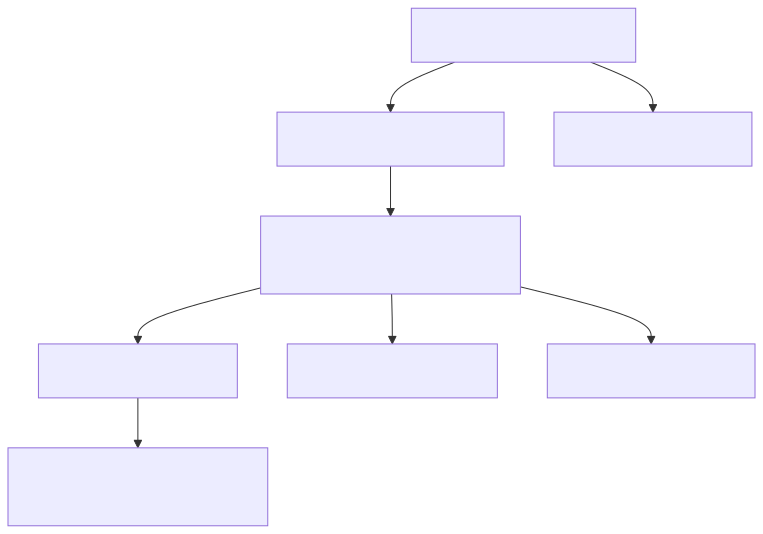

In [62]:
# @title
mm("""
graph TD
    A[Preparation & Planning] --> B[Backup and Verification]
    B --> C[Failure Simulation & Recovery Execution]
    C --> D[Validation & Testing]
    D --> E[Review & Continuous Improvement]

    %% Adding RPO and RTO annotations
    A --> F[Define RPO & RTO]
    C --> G[RPO: Max Data Loss]
    C --> H[RTO: Max Downtime]


""")

### Data Backup at the Toad Medical Center

Data backup is an essential component of the Toad Town Medical Center's disaster recovery (DR) plan. By regularly backing up its data, the medical center can ensure that critical information can be quickly restored in the event of a disaster. There are several types of data backups, each with its own advantages and use cases.

Types of data backup include:

1.  A **full backup** captures a complete copy of all data at a specific point in time. This type of backup is the most comprehensive but also the most time-consuming and storage-intensive. Full backups are typically performed weekly or monthly and serve as the foundation for other types of backups. For example, the Toad Town Medical Center may perform a full backup of its EHR system every Sunday night.
2.  An **incremental backup** captures only the data that has changed since the last backup, whether it was a full or incremental backup. This type of backup is faster and requires less storage than a full backup but may take longer to restore, as multiple incremental backups may need to be applied. Incremental backups are often performed daily. For example, the Toad Town Medical Center may perform incremental backups of its EHR system every weeknight.
3.  A **differential backup** captures all the data that has changed since the last full backup. This type of backup falls between full and incremental backups in terms of speed and storage requirements. Differential backups are typically performed several times a week. For example, the Toad Town Medical Center may perform a differential backup of its EHR system every Wednesday and Friday night.
4. **Database dumping** is the process of exporting the contents of a database into a file, which can then be backed up or transferred to another system. This technique is commonly used for backing up databases that are not easily backed up using standard file-level backup methods. For example, the Toad Town Medical Center may use database dumping to backup its laboratory information system, which uses a proprietary database format.


#### Scheduling Data Backup
To ensure that backups are performed regularly and consistently, the Toad Town Medical Center should create a **backup schedule** that specifies the type and frequency of backups for each system or dataset. The schedule should take into account factors such as the criticality of the data, the rate of data change, and the available storage capacity. For example, the medical center may schedule:

-   Weekly full backups of all systems on Sunday nights
-   Daily incremental backups of the EHR system and other critical systems
-   Twice-weekly differential backups of the laboratory information system
-   Monthly database dumps of the pharmacy inventory management system

By implementing a comprehensive data backup strategy that includes full, incremental, and differential backups, as well as database dumping and regular scheduling, the Toad Town Medical Center can ensure that its critical data is always protected and can be quickly restored in the event of a disaster.

### Testing and Validating Backups at the Toad Medical Center

To ensure that backups are reliable and can be used to restore data in the event of a disaster, the Toad Town Medical Center should regularly test and validate its backups. One common method for validating backups is to use a hash function.

A **hash function** is a mathematical algorithm that takes an input (in this case, the backup data) and produces a unique, fixed-size string of characters called a hash. By comparing the hash of the backup data to the hash of the original data, the medical center can verify that the backup is an exact copy and has not been corrupted or altered.

For example, after performing a full backup of its EHR system, the Toad Town Medical Center can calculate the hash of the backup data and compare it to the hash of the original data. If the hashes match, the medical center can be confident that the backup is valid and can be used for restoration if needed.

### Storing Backups: On-site vs. Off-site

Another important consideration for the Toad Town Medical Center is where to store its backups. There are two main options: on-site storage and off-site storage.

1. **On-site storage** refers to keeping backup data at the same location as the primary systems. This approach allows for faster restoration times but may be vulnerable to local disasters such as fires or floods. For example, the Toad Town Medical Center may store its daily incremental backups on a local server in the data center.
2. **Off-site storage** involves keeping backup data at a separate location, such as a remote data center or cloud storage provider. This approach provides better protection against local disasters but may result in slower restoration times. For example, the Toad Town Medical Center may store its weekly full backups at a secure, off-site data center located in a different region of the Mushroom Kingdom.

To ensure the best protection for its data, the Toad Town Medical Center should use a combination of on-site and off-site storage, balancing the need for fast restoration with the need for disaster resilience.

### Retention Policy: Purge vs. Archive

Finally, the Toad Town Medical Center should establish a retention policy that specifies how long backup data should be kept before being purged or archived. Purging refers to the permanent deletion of backup data that is no longer needed, while archiving involves moving backup data to long-term storage for historical or compliance purposes.

The retention policy should take into account factors such as legal and regulatory requirements, storage capacity, and the criticality of the data. For example, the Toad Town Medical Center may:

-   Retain daily incremental backups for 30 days before purging them
-   Retain weekly full backups for 6 months before archiving them
-   Archive monthly database dumps of the pharmacy inventory management system for 7 years to comply with regulatory requirements

By testing and validating its backups, using a mix of on-site and off-site storage, and implementing a clear retention policy, the Toad Town Medical Center can ensure that its backup data is reliable, secure, and available when needed, while also optimizing storage capacity and complying with relevant regulations.

In [63]:
# @title
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Business Continuity Quiz</title>
    <style>
        body { font-family: Arial, sans-serif; }
        .quiz-container { width: 80%; max-width: 800px; margin: 20px auto; padding: 20px; border: 1px solid #ccc; border-radius: 5px; }
        .question-container { margin-bottom: 20px; padding: 15px; border: 1px solid #eee; border-radius: 5px; background-color: #f9f9f9; }
        .question { margin-bottom: 10px; }
        .options label { display: block; margin-bottom: 10px; }
        .feedback { margin-top: 10px; padding: 10px; border-radius: 5px; display: none; }
        .feedback.correct { background-color: #d4edda; color: #155724; border: 1px solid #c3e6cb; }
        .feedback.incorrect { background-color: #f8d7da; color: #721c24; border: 1px solid #f5c6cb; }
        button { padding: 10px 20px; border: none; border-radius: 5px; background-color: #007bff; color: white; cursor: pointer; margin-right: 10px; }
        button:hover { background-color: #0056b3; }
        .next-button-container { margin-top: 15px; text-align: right; display: none; } /* For Next Question button */
    </style>
</head>
<body>
    <div class="quiz-container">
        <h1>Business Continuity Quiz</h1>
        <div id="quiz-questions">
            </div>
        <div id="results" style="display: none; margin-top: 20px; font-weight: bold;">Quiz Complete!</div>
    </div>

    <script>
        const quizData = [
    {
        question: "What is the primary goal of Disaster Recovery (DR) planning for Toad Medical Center?",
        options: [
            {text: "To increase the medical center's revenue.", value: "Increase revenue", explanation: "DR planning focuses on operational resilience, not direct revenue generation."},
            {text: "To minimize the impact of disasters and restore critical systems.", value: "Restore systems", explanation: null},
            {text: "To upgrade all IT infrastructure.", value: "Upgrade IT", explanation: "Upgrading IT might be part of mitigation, but not the primary goal of DR planning itself."},
            {text: "To train staff on new medical procedures.", value: "Train staff", explanation: "Staff training is important but not the focus of DR planning, which is about system and data recovery."}
        ],
        correctAnswer: "Restore systems",
        explanation: "The main goal of DR planning is to minimize the impact of disasters and ensure the medical center can quickly restore critical systems and data to maintain patient care."
    },
    {
        question: "Identifying potential threats like cyber-attacks and natural disasters is part of which DR planning component?",
        options: [
            {text: "Mitigation strategies", value: "Mitigation", explanation: "Mitigation strategies are about reducing impact, not identifying threats."},
            {text: "Documentation", value: "Documentation", explanation: "Documentation records the plan, but isn't the identification phase."},
            {text: "Risk assessment", value: "Risk assessment", explanation: null},
            {text: "Testing", value: "Testing", explanation: "Testing validates the plan against identified risks, but doesn't identify the risks themselves."}
        ],
        correctAnswer: "Risk assessment",
        explanation: "Risk assessment involves identifying potential risks and vulnerabilities that could affect the medical center, forming the foundation of the DR plan."
    },
    {
        question: "Implementing backup power systems is an example of a:",
        options: [
            {text: "Risk assessment", value: "Risk assessment", explanation: "Risk assessment is identifying vulnerabilities, not implementing solutions."},
            {text: "Documentation procedure", value: "Documentation", explanation: "Documentation describes procedures, but backup power is an action."},
            {text: "Mitigation strategy", value: "Mitigation", explanation: null},
            {text: "Testing protocol", value: "Testing", explanation: "Testing validates effectiveness, it's not the implementation of backup systems."}
        ],
        correctAnswer: "Mitigation",
        explanation: "Mitigation strategies are actions taken to minimize the impact of identified risks. Backup power directly mitigates the risk of power outages."
    },
    {
        question: "Which document outlines step-by-step instructions for restoring the EHR system at Toad Medical Center?",
        options: [
            {text: "System security plan", value: "Security plan", explanation: "Security plans focus on protection, not restoration procedures."},
            {text: "Continuity of Operations Plan (COOP)", value: "COOP", explanation: "COOP focuses on maintaining essential functions, broader than system-specific restoration."},
            {text: "DR manual", value: "DR manual", explanation: null},
            {text: "Build documentation", value: "Build documentation", explanation: "Build documentation details system configuration, not step-by-step recovery *procedures*."}
        ],
        correctAnswer: "DR manual",
        explanation: "DR manuals are comprehensive guides that outline the specific steps and procedures for recovering systems like the EHR, including step-by-step instructions."
    },
    {
        question: "A System Security Plan primarily focuses on:",
        options: [
            {text: "Restoring data after a disaster.", value: "Restoring data", explanation: "Restoring data is addressed in DR manuals and backup procedures."},
            {text: "Maintaining operations during a disaster.", value: "Maintaining operations", explanation: "Maintaining operations is the focus of the COOP."},
            {text: "Protecting systems and data from threats.", value: "Protecting systems", explanation: null},
            {text: "Documenting system configurations.", value: "Documenting configurations", explanation: "Build documentation covers system configurations."}
        ],
        correctAnswer: "Protecting systems",
        explanation: "A System Security Plan documents security measures like access controls, encryption, and network security to protect against threats."
    },
    {
        question: "Toad Medical Center's COOP would detail procedures for:",
        options: [
            {text: "Validating data backups.", value: "Validating backups", explanation: "Backup validation is a part of data backup and testing processes."},
            {text: "Relocating operations to a secondary site.", value: "Relocating operations", explanation: null},
            {text: "Calculating RPO and RTO.", value: "Calculating RPO/RTO", explanation: "RPO and RTO are determined during DR planning and testing."},
            {text: "Hashing backup data.", value: "Hashing data", explanation: "Hashing is used for backup validation, not COOP."}
        ],
        correctAnswer: "Relocating operations",
        explanation: "The Continuity of Operations Plan (COOP) describes how essential functions will be maintained, including procedures for relocating to a secondary site."
    },
    {
        question: "Which DR technique involves creating a real-time, exact copy of a system?",
        options: [
            {text: "Replication", value: "Replication", explanation: "Replication is copying data, but not always in real-time or system-wide mirroring."},
            {text: "Log shipping", value: "Log shipping", explanation: "Log shipping is specific to databases and transaction logs, not full system copies."},
            {text: "High availability", value: "High availability", explanation: "High availability ensures system uptime through redundancy, not necessarily real-time copying."},
            {text: "Mirroring", value: "Mirroring", explanation: null}
        ],
        correctAnswer: "Mirroring",
        explanation: "Mirroring creates an exact copy in real-time, ensuring instant reflection of changes for near-zero downtime, unlike replication or log shipping."
    },
    {
        question: "Sending transaction logs from a primary database to a standby database describes:",
        options: [
            {text: "Replication", value: "Replication", explanation: "Replication is a broader data copying technique, not specifically log-based."},
            {text: "Mirroring", value: "Mirroring", explanation: "Mirroring is real-time system or database copy, not log-based."},
            {text: "High availability", value: "High availability", explanation: "High availability is about system uptime, not a specific data transfer method like log shipping."},
            {text: "Log shipping", value: "Log shipping", explanation: null}
        ],
        correctAnswer: "Log shipping",
        explanation: "Log shipping specifically involves sending transaction logs to a secondary database to keep it consistent and ready for failover."
    },
    {
        question: "The maximum acceptable data loss measured in time is the:",
        options: [
            {text: "Recovery Time Objective (RTO)", value: "RTO", explanation: "RTO is about downtime, not data loss."},
            {text: "Service Level Agreement (SLA)", value: "SLA", explanation: "SLAs are broader agreements about service, not specifically data loss objectives."},
            {text: "Recovery Point Objective (RPO)", value: "RPO", explanation: null},
            {text: "Mean Time To Recovery (MTTR)", value: "MTTR", explanation: "MTTR is the average time to repair a failure, related to RTO but not data loss."}
        ],
        correctAnswer: "RPO",
        explanation: "Recovery Point Objective (RPO) defines the maximum acceptable amount of data loss, measured back in time from a disaster event."
    },
    {
        question: "The maximum acceptable downtime for the laboratory information system is the:",
        options: [
            {text: "Recovery Point Objective (RPO)", value: "RPO", explanation: "RPO is about data loss, not downtime."},
            {text: "Build Documentation", value: "Build Documentation", explanation: "Build documentation is about system specs, not downtime targets."},
            {text: "Recovery Time Objective (RTO)", value: "RTO", explanation: null},
            {text: "System Security Plan", value: "Security Plan", explanation: "Security plans protect systems, they don't define downtime targets."}
        ],
        correctAnswer: "RTO",
        explanation: "Recovery Time Objective (RTO) defines the maximum acceptable time a system can be unavailable after a disaster."
    },
    {
        question: "A full data backup is best described as:",
        options: [
            {text: "Backing up only changed data since the last backup.", value: "Incremental", explanation: "This describes an incremental backup."},
            {text: "Backing up data changed since the last full backup.", value: "Differential", explanation: "This describes a differential backup."},
            {text: "A complete copy of all data.", value: "Full backup", explanation: null},
            {text: "Exporting database contents to a file.", value: "Database dump", explanation: "This describes database dumping, a specific backup technique."}
        ],
        correctAnswer: "Full backup",
        explanation: "A full backup is a complete copy of all data at a specific point in time, being the most comprehensive type of backup."
    },
    {
        question: "Which type of backup is the fastest to perform daily?",
        options: [
            {text: "Full backup", value: "Full", explanation: "Full backups are the slowest and most storage-intensive."},
            {text: "Differential backup", value: "Differential", explanation: "Differential backups are faster than full but slower than incremental."},
            {text: "Incremental backup", value: "Incremental", explanation: null},
            {text: "Database dump", value: "Database dump", explanation: "Database dump speed varies but isn't primarily designed for daily backups of *all* data."}
        ],
        correctAnswer: "Incremental",
        explanation: "Incremental backups are the fastest for daily use as they only capture changes since the last backup, minimizing time and storage."
    },
    {
        question: "A differential backup contains data changed since the last:",
        options: [
            {text: "Incremental backup", value: "Incremental", explanation: "Incremental backups are the base for *next* incremental backups, not differentials."},
            {text: "Differential backup", value: "Differential", explanation: "Differential backups are based on the *last full* backup, not other differentials."},
            {text: "Full backup", value: "Full backup", explanation: null},
            {text: "Daily backup", value: "Daily backup", explanation: "'Daily backup' is too general; differentials are specifically related to the *full* backup."}
        ],
        correctAnswer: "Full backup",
        explanation: "Differential backups capture all changes made since the *last full backup*, growing in size until the next full backup."
    },
    {
        question: "Exporting a database into a file for backup is known as:",
        options: [
            {text: "Incremental backup", value: "Incremental", explanation: "Incremental backups track file changes, not database exports."},
            {text: "Differential backup", value: "Differential", explanation: "Differential backups are also file-level changes since the last full backup."},
            {text: "Database dumping", value: "Database dumping", explanation: null},
            {text: "Full backup", value: "Full backup", explanation: "Full backups are complete copies of all data, database dumping is a specific method for databases."}
        ],
        correctAnswer: "Database dumping",
        explanation: "Database dumping is the process of exporting the entire database content into a file, often used for databases that are hard to backup using standard file methods."
    },
    {
        question: "Calculating a hash of backup data is used for:",
        options: [
            {text: "Scheduling backups", value: "Scheduling", explanation: "Hashing is for validation, not scheduling."},
            {text: "Encrypting backups", value: "Encrypting", explanation: "Hashing is for integrity, not encryption (though encryption is also important for backups)."},
            {text: "Validating backup integrity", value: "Validating integrity", explanation: null},
            {text: "Compressing backup data", value: "Compressing", explanation: "Hashing is for verifying data, compression reduces size."}
        ],
        correctAnswer: "Validating integrity",
        explanation: "Hashing creates a unique fingerprint of the data. Comparing hashes of original and backup data verifies if the backup is an exact, uncorrupted copy."
    },
    {
        question: "Storing daily incremental backups on a local server is an example of:",
        options: [
            {text: "Off-site storage", value: "Off-site", explanation: "Off-site storage is in a separate geographical location."},
            {text: "Cloud storage", value: "Cloud storage", explanation: "Cloud storage *can* be off-site, but local servers are on-site."},
            {text: "On-site storage", value: "On-site", explanation: null},
            {text: "Archival storage", value: "Archival", explanation: "Archival storage is long-term storage for retention policies, not location-based."}
        ],
        correctAnswer: "On-site",
        explanation: "On-site storage means keeping backups at the same location as the primary systems, like a local server in the data center."
    },
    {
        question: "Storing weekly full backups at a remote data center is an example of:",
        options: [
            {text: "On-site storage", value: "On-site", explanation: "On-site is at the primary location."},
            {text: "Incremental backup", value: "Incremental", explanation: "Incremental backup is a type of backup, not a storage location."},
            {text: "Off-site storage", value: "Off-site", explanation: null},
            {text: "Data purging", value: "Purging", explanation: "Purging is data deletion, not storage location."}
        ],
        correctAnswer: "Off-site",
        explanation: "Off-site storage involves keeping backups at a geographically separate location like a remote data center for disaster resilience."
    },
    {
        question: "Deleting backup data that is no longer needed is referred to as:",
        options: [
            {text: "Archiving", value: "Archiving", explanation: "Archiving is moving data to long-term storage, not deletion."},
            {text: "Retention", value: "Retention", explanation: "Retention is the policy of how long to keep data, encompassing both purging and archiving."},
            {text: "Purging", value: "Purging", explanation: null},
            {text: "Replication", value: "Replication", explanation: "Replication is data copying for redundancy, not deletion."}
        ],
        correctAnswer: "Purging",
        explanation: "Purging is the permanent deletion of backup data that is no longer required based on the retention policy."
    },
    {
        question: "Moving backup data to long-term storage for compliance is:",
        options: [
            {text: "Purging", value: "Purging", explanation: "Purging is permanent deletion."},
            {text: "Retention", value: "Retention", explanation: "Retention is the overall policy, not the specific action of long-term storage."},
            {text: "Archiving", value: "Archiving", explanation: null},
            {text: "Incremental backup", value: "Incremental", explanation: "Incremental backup is a type of backup, not long-term storage."}
        ],
        correctAnswer: "Archiving",
        explanation: "Archiving involves moving backup data to long-term storage, often for historical or compliance reasons, as defined in the retention policy."
    },
    {
        question: "A backup retention policy should consider all EXCEPT:",
        options: [
            {text: "Legal and regulatory requirements", value: "Legal requirements"},
            {text: "Storage capacity", value: "Storage capacity"},
            {text: "Data criticality", value: "Data criticality"},
            {text: "The brand of tape drives used", value: "Tape drive brand", explanation: null}
        ],
        correctAnswer: "Tape drive brand",
        explanation: "While reliable hardware is important, the *brand* of tape drives is not a direct factor in *defining* a data retention policy. Policy drivers are legal needs, storage limits, and data importance."
    }
];

        const quizQuestionsDiv = document.getElementById('quiz-questions');
        const resultsDiv = document.getElementById('results');

        let currentQuestionIndex = 0;
        let questionContainers = [];

        function buildQuiz() {
            quizData.forEach((questionData, questionIndex) => {
                const questionContainerDiv = document.createElement('div');
                questionContainerDiv.classList.add('question-container');
                questionContainerDiv.id = `question-${questionIndex}`;

                const questionText = document.createElement('p');
                questionText.classList.add('question');
                questionText.innerText = `${questionIndex + 1}. ${questionData.question}`;
                questionContainerDiv.appendChild(questionText);

                const optionsDiv = document.createElement('div');
                optionsDiv.classList.add('options');
                questionData.options.forEach(option => {
                    const label = document.createElement('label');
                    const radio = document.createElement('input');
                    radio.type = 'radio';
                    radio.name = `question${questionIndex}`;
                    radio.value = option.value;
                    label.appendChild(radio);
                    label.appendChild(document.createTextNode(option.text));
                    optionsDiv.appendChild(label);
                });
                questionContainerDiv.appendChild(optionsDiv);

                const feedbackDiv = document.createElement('div');
                feedbackDiv.classList.add('feedback');
                feedbackDiv.id = `feedback-${questionIndex}`;
                questionContainerDiv.appendChild(feedbackDiv);

                const submitButton = document.createElement('button');
                submitButton.innerText = "Submit Answer";
                submitButton.addEventListener('click', () => checkAnswer(questionIndex)); // Pass questionIndex to checkAnswer
                questionContainerDiv.appendChild(submitButton);

                const nextButtonContainer = document.createElement('div');
                nextButtonContainer.classList.add('next-button-container');
                nextButtonContainer.id = `next-button-container-${questionIndex}`;
                const nextQuestionButton = document.createElement('button');
                nextQuestionButton.innerText = "Next Question";
                nextQuestionButton.addEventListener('click', nextQuestion);
                nextButtonContainer.appendChild(nextQuestionButton);
                questionContainerDiv.appendChild(nextButtonContainer);


                quizQuestionsDiv.appendChild(questionContainerDiv);
                questionContainers.push(questionContainerDiv);
            });
        }

        function showQuestion(index) {
            questionContainers.forEach((container, i) => {
                container.style.display = i === index ? 'block' : 'none';
            });
            resultsDiv.style.display = 'none'; // Hide final results when showing questions
        }

        function checkAnswer(questionIndex) {
            const selectedOption = document.querySelector(`input[name="question${questionIndex}"]:checked`);
            const feedbackDiv = document.getElementById(`feedback-${questionIndex}`);
            const nextButtonContainer = document.getElementById(`next-button-container-${questionIndex}`);

            if (selectedOption) {
                let isCorrect = false;
                let specificExplanation = "";

                quizData[questionIndex].options.forEach(option => { // Iterate through options
                    if (option.value === selectedOption.value) {
                        if (option.value === quizData[questionIndex].correctAnswer) {
                            isCorrect = true;
                            specificExplanation = "Correct! " + quizData[questionIndex].explanation; // General correct explanation
                        } else {
                            specificExplanation = "Incorrect. " + option.explanation; // Specific incorrect option explanation
                        }
                    }
                });


                if (isCorrect) {
                    feedbackDiv.classList.remove('incorrect');
                    feedbackDiv.classList.add('correct');
                    feedbackDiv.innerText = specificExplanation;
                    nextButtonContainer.style.display = 'block'; // Show Next Question button
                } else {
                    feedbackDiv.classList.remove('correct');
                    feedbackDiv.classList.add('incorrect');
                    feedbackDiv.innerText = specificExplanation;
                    nextButtonContainer.style.display = 'none';
                }
            } else {
                feedbackDiv.classList.remove('correct');
                feedbackDiv.classList.add('incorrect');
                feedbackDiv.innerText = `No answer selected. Explanation: ${quizData[questionIndex].explanation}`; // Fallback to general explanation if no answer selected (though technically they *could* select and then deselect)
                nextButtonContainer.style.display = 'none';
            }
            feedbackDiv.style.display = 'block';
        }

        function nextQuestion() {
            currentQuestionIndex++;
            if (currentQuestionIndex < quizData.length) {
                showQuestion(currentQuestionIndex);
            } else {
                showQuestion(-1); // Hide questions, show results
                resultsDiv.style.display = 'block';
            }
        }


        buildQuiz();
        showQuestion(currentQuestionIndex); // Show the first question
    </script>
</body>
</html>

## Review With Quizlet

In [64]:
%%html
<iframe src="https://quizlet.com/926629081/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary
| Term | Definition |
|------|------------|
| GROUP BY | SQL clause used to group rows that have the same values in specified columns. |
| HAVING | Clause used to specify a search condition for a group or an aggregate. |
| JSON (JavaScript Object Notation) | A lightweight data interchange format that is easy for humans to read and write and easy for machines to parse and generate. |
| Big O Notation | Mathematical notation used to describe the performance or complexity of an algorithm. |
| O(1) | Constant time complexity in Big O notation, where the algorithm always executes in the same time regardless of input size. |
| O(n) | Linear time complexity in Big O notation, where the algorithm's execution time grows linearly with the input size. |
| O(n log n) | Linearithmic time complexity in Big O notation, often seen in efficient sorting algorithms. |
| O(n^2) | Quadratic time complexity in Big O notation, often seen in algorithms with nested iterations over the data. |
| O(n^3) | Cubic time complexity in Big O notation, often seen in algorithms with three nested loops. |
| Subquery | A query nested inside another query, used to return data that will be used in the main query. |
| json_extract() | SQLite function used to extract data from a JSON-formatted string. |
| PRINTF | SQLite function used to format strings, often used for formatting numeric output. |
| XML (eXtensible Markup Language) | A markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. |
| Aggregate Function | A function that performs a calculation on a set of values and returns a single result, such as COUNT(), SUM(), or AVG(). |
| Table Alias | A temporary name assigned to a table in a SQL query, often used to simplify complex queries. |
| Nested Query | Another term for a subquery, where one query is embedded within another query. |
| JSON Path Expression | A way to navigate and extract data from a JSON document, often used with json_extract(). |
| Hybrid Database | A database system that combines features of both relational and non-relational databases, such as supporting JSON in SQL databases. |
| Document Database | A type of non-relational database designed to store and query data as JSON-like documents. |
| Query Optimization | The process of improving the performance of a database query, often involving rewriting the query or understanding its complexity using Big O notation. |
| Business Continuity | The capability of an organization to continue delivering products or services at acceptable predefined levels following a disruptive incident. |
| Disaster Recovery (DR) | The process of restoring systems, data, and infrastructure after a catastrophic event to maintain or quickly resume mission-critical functions. |
| Risk Assessment | The process of identifying potential threats and vulnerabilities that could affect an organization's operations and assets. |
| Mitigation Strategies | Actions taken to reduce the impact and likelihood of identified risks, such as implementing backup systems or security measures. |
| Electronic Health Record (EHR) | A digital version of a patient's medical history, maintained by healthcare providers over time. |
| Redundant Systems | Duplicate critical components or functions of a system to increase reliability and availability in case of failure. |
| DR Manual | A comprehensive guide outlining steps and procedures for responding to and recovering from a disaster. |
| System Security Plan | A document detailing the security measures in place to protect critical systems and data from unauthorized access or damage. |
| Continuity of Operations Plan (COOP) | A plan describing how an organization will maintain essential functions during and after a disaster or disruption. |
| Build Documentation | Technical specifications and configurations for systems and infrastructure, crucial for quickly rebuilding after a disaster. |
| Replication | The process of creating an exact copy of data and storing it on a separate system or location. |
| Log Shipping | A technique used to create a standby database by automatically sending transaction logs from the primary to a secondary database. |
| High Availability | The ability of a system to continue functioning even if one or more of its components fail, often achieved through redundancy. |
| Mirroring | Creating an exact, real-time copy of a system or database, with changes instantly reflected in the mirrored system. |
| Recovery Point Objective (RPO) | The maximum acceptable amount of data loss measured in time, representing the point to which data must be recovered after a disaster. |
| Recovery Time Objective (RTO) | The maximum acceptable amount of time that a system can be down after a disaster before being restored to an operational state. |
| Full Backup | A complete copy of all data at a specific point in time, typically performed weekly or monthly. |
| Incremental Backup | A backup that captures only the data that has changed since the last backup, whether full or incremental. |
| Differential Backup | A backup that captures all data changed since the last full backup, falling between full and incremental in terms of speed and storage requirements. |
| Hash Function | A mathematical algorithm that produces a unique, fixed-size string of characters (hash) from input data, used to verify data integrity. |

### SQL

| Answer | Close Query |
| --- | --- |
| GROUP BY | In "SELECT category, COUNT(\*) FROM items _______ category", this groups the results by each unique category. |
| HAVING | In "SELECT region, COUNT(\*) FROM locations GROUP BY region _______ COUNT(\*) > 5", this filters grouped results to show only regions with more than 5 locations. |
| json_extract | In "SELECT name, ______ (attributes, '\$.color') FROM entities WHERE type = 'A'", this extracts the color from the attributes JSON column. |
| attributes, '\$.color' | In "SELECT name, json_extract(_______, _______) FROM entities WHERE type = 'A'", this extracts the color from the attributes JSON column. |
| '%.2f' | In "SELECT category, PRINTF(_______, avg_value) FROM statistics", this formats the 'avg_value' to display with 2 decimal places. |
| type | In "SELECT _______, SUM(points) FROM elements GROUP BY _______", this groups the results by the `type` of element. |
| properties, '$.effects.duration' | In "SELECT item_name, json_extract(_______, _______) FROM inventory WHERE category = 'temporary'", this extracts the duration from a nested JSON structure in the properties column. |
| '%d' | In "SELECT task_name, PRINTF(_______ \|\| ' points', score) FROM achievements WHERE difficulty = 'hard'", this formats the 'score' as a string with "points". |
| region | In "SELECT _______, COUNT(\*) FROM resources GROUP BY _______", this groups resource counts by region. |
| skills, '\$.abilities[0].name' | In "SELECT name, json_extract(_______, _______) FROM characters WHERE class = 'advanced'", this extracts the name of the first ability from an array in the skills JSON column. |
| properties, '\$.tags[2]' | In "SELECT name, json_extract(_______, _______) FROM items WHERE category = 'equipment'", this extracts the third tag from a tags array in the properties JSON column. |
| inventory, '\$.items[\*].quantity' | In "SELECT player_id, json_extract(_______, _______) FROM players", this extracts the quantities of all items from an items array in the inventory JSON column. |